### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ


#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 7


#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Гебриал Ибрам Есам Зекри
##### Группа:   НПИбд-01-18

## Москва 2021
***

### вариант 27

Libras Movement Data Set 

Название файла: movement_libras.data 

Ссылка: http://archive.ics.uci.edu/ml/datasets/Libras+Movement 

Класс: class (столбец No 91) 

1. Считайте заданный набор данных из репозитария UCI.

 

2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на средние значения признака. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding).
 

3. Используя метод отбора на основе важности признаков класса ExtraTreesClassifier, определите и оставьте в наборе наиболее важные признаки (не менее 5 и не более 10).
 

4. Разбейте набор данных на обучающую и тестовую выборки.
 

5. Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 5, определите точность классификации и визуализируйте границу принятия решений и построенное дерево решений. При визуализации границы принятия решений используйте два признака с наиболее высокой оценкой важности (не нужно удалять из набора все признаки кроме двух).

 

6. Постройте на основе классификатора деревьев решений ансамблевые классификаторы:

- BaggingClassifier,
- RandomForestClassifier,
- AdaBoostClassifier,

а также классификатор:
- GradientBoostingClassifier,

подберите параметры классификаторов, чтобы добиться большей точности классификации, и постройте границы принятия решений классификаторов с визуализацией точек набора данных и легендой для меток классов.

7.  Определите лучший ансамблевый классификатор, дающий наиболее высокую точность классификации.

 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

#### 1. Считайте заданный набор данных из репозитария UCI.

In [2]:
url = \
"http://archive.ics.uci.edu/ml/machine-learning-databases/libras/movement_libras.data"
# считываем данные в объект DataFrame
my_data = pd.read_csv( url,sep="," ,header=None )
my_data = pd.read_csv( url,sep="," ,header=None,prefix="V" )
print("\n*** Начало данных:\n", my_data.head()) #начальные данные
print("\n*** Конец данных:\n",  my_data.tail()) #конечные данные

summary = my_data.describe()                    #сводка данных 
print("\n*** Сводка данных:\n", summary)


*** Начало данных:
         V0       V1       V2       V3       V4       V5       V6       V7  \
0  0.79691  0.38194  0.79691  0.37731  0.79884  0.37731  0.79497  0.37731   
1  0.67892  0.27315  0.68085  0.27315  0.68085  0.27315  0.68085  0.27315   
2  0.72147  0.23611  0.72340  0.23611  0.72340  0.23611  0.72340  0.23611   
3  0.56480  0.32407  0.56286  0.32407  0.56093  0.32407  0.55899  0.32407   
4  0.67118  0.38426  0.67118  0.38657  0.67311  0.38657  0.67311  0.38426   

        V8       V9  ...      V81      V82      V83      V84      V85  \
0  0.77563  0.35417  ...  0.51389  0.39845  0.42593  0.47389  0.36111   
1  0.67892  0.26852  ...  0.57407  0.17795  0.63657  0.17215  0.67361   
2  0.72340  0.23611  ...  0.30556  0.59768  0.25926  0.67118  0.25231   
3  0.55899  0.32407  ...  0.49074  0.26306  0.42361  0.33269  0.34722   
4  0.67311  0.37963  ...  0.76389  0.44101  0.64120  0.45068  0.54167   

       V86      V87      V88      V89  V90  
0  0.55899  0.31250  0.63830  0.

In [3]:
target=my_data['V90']
target

0       1
1       1
2       1
3       1
4       1
       ..
355    15
356    15
357    15
358    15
359    15
Name: V90, Length: 360, dtype: int64

In [4]:
print('Типы признаков:')
for col in my_data.columns:
    print('\t%s: %s' % (col, my_data[col].dtypes))

Типы признаков:
	V0: float64
	V1: float64
	V2: float64
	V3: float64
	V4: float64
	V5: float64
	V6: float64
	V7: float64
	V8: float64
	V9: float64
	V10: float64
	V11: float64
	V12: float64
	V13: float64
	V14: float64
	V15: float64
	V16: float64
	V17: float64
	V18: float64
	V19: float64
	V20: float64
	V21: float64
	V22: float64
	V23: float64
	V24: float64
	V25: float64
	V26: float64
	V27: float64
	V28: float64
	V29: float64
	V30: float64
	V31: float64
	V32: float64
	V33: float64
	V34: float64
	V35: float64
	V36: float64
	V37: float64
	V38: float64
	V39: float64
	V40: float64
	V41: float64
	V42: float64
	V43: float64
	V44: float64
	V45: float64
	V46: float64
	V47: float64
	V48: float64
	V49: float64
	V50: float64
	V51: float64
	V52: float64
	V53: float64
	V54: float64
	V55: float64
	V56: float64
	V57: float64
	V58: float64
	V59: float64
	V60: float64
	V61: float64
	V62: float64
	V63: float64
	V64: float64
	V65: float64
	V66: float64
	V67: float64
	V68: float64
	V69: float64
	V70: float64


In [5]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 91 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      360 non-null    float64
 1   V1      360 non-null    float64
 2   V2      360 non-null    float64
 3   V3      360 non-null    float64
 4   V4      360 non-null    float64
 5   V5      360 non-null    float64
 6   V6      360 non-null    float64
 7   V7      360 non-null    float64
 8   V8      360 non-null    float64
 9   V9      360 non-null    float64
 10  V10     360 non-null    float64
 11  V11     360 non-null    float64
 12  V12     360 non-null    float64
 13  V13     360 non-null    float64
 14  V14     360 non-null    float64
 15  V15     360 non-null    float64
 16  V16     360 non-null    float64
 17  V17     360 non-null    float64
 18  V18     360 non-null    float64
 19  V19     360 non-null    float64
 20  V20     360 non-null    float64
 21  V21     360 non-null    float64
 22  V2

#### 2. Если среди меток класса имеются пропущенные значения, то удалите записи с пропущенными метками класса. Если в признаках имеются пропущенные значения, то замените их на средние значения признака. Если какие-либо числовые признаки в наборе были распознаны неверно, то преобразуйте их в числовые. Преобразуйте категориальные признаки в числовые при помощи кодирования меток (label encoding).

In [6]:
my_data = my_data.replace('?',np.NaN) # заменить '?' на np.NaN
print('Число отсутствующих значений:')
for col in my_data.columns:
    print('\t%s: %d' % (col,my_data[col].isna().sum()))

Число отсутствующих значений:
	V0: 0
	V1: 0
	V2: 0
	V3: 0
	V4: 0
	V5: 0
	V6: 0
	V7: 0
	V8: 0
	V9: 0
	V10: 0
	V11: 0
	V12: 0
	V13: 0
	V14: 0
	V15: 0
	V16: 0
	V17: 0
	V18: 0
	V19: 0
	V20: 0
	V21: 0
	V22: 0
	V23: 0
	V24: 0
	V25: 0
	V26: 0
	V27: 0
	V28: 0
	V29: 0
	V30: 0
	V31: 0
	V32: 0
	V33: 0
	V34: 0
	V35: 0
	V36: 0
	V37: 0
	V38: 0
	V39: 0
	V40: 0
	V41: 0
	V42: 0
	V43: 0
	V44: 0
	V45: 0
	V46: 0
	V47: 0
	V48: 0
	V49: 0
	V50: 0
	V51: 0
	V52: 0
	V53: 0
	V54: 0
	V55: 0
	V56: 0
	V57: 0
	V58: 0
	V59: 0
	V60: 0
	V61: 0
	V62: 0
	V63: 0
	V64: 0
	V65: 0
	V66: 0
	V67: 0
	V68: 0
	V69: 0
	V70: 0
	V71: 0
	V72: 0
	V73: 0
	V74: 0
	V75: 0
	V76: 0
	V77: 0
	V78: 0
	V79: 0
	V80: 0
	V81: 0
	V82: 0
	V83: 0
	V84: 0
	V85: 0
	V86: 0
	V87: 0
	V88: 0
	V89: 0
	V90: 0


У меня нет пропущенных значений

#### 3. Используя метод отбора на основе важности признаков класса ExtraTreesClassifier, определите и оставьте в наборе наиболее важные признаки (не менее 5 и не более 10).

In [7]:
X = my_data.iloc[:,0:90]
y = my_data.iloc[:,90]

In [185]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)
print(model.feature_importances_)

[0.01232529 0.01421506 0.01209921 0.01458313 0.01396792 0.01557335
 0.01286131 0.01649086 0.01236763 0.01301637 0.01165911 0.01674067
 0.00979739 0.01342967 0.01114642 0.01384471 0.01113389 0.0100665
 0.01209096 0.01132851 0.00970177 0.01349746 0.00907703 0.01362698
 0.00983933 0.01308182 0.01051528 0.01693804 0.01056985 0.01822205
 0.01065283 0.01579777 0.00894554 0.01352832 0.00797936 0.01222627
 0.00897789 0.00960286 0.00770807 0.0082838  0.00850099 0.00971499
 0.00666836 0.01062984 0.00822377 0.01162302 0.01079042 0.01283443
 0.01026535 0.01244996 0.01150068 0.01515896 0.00937937 0.01365255
 0.00955286 0.01355495 0.00817605 0.01310228 0.00716193 0.01237905
 0.00797832 0.00937687 0.00749798 0.00962183 0.00722038 0.00747029
 0.00884966 0.00878663 0.00867862 0.01117984 0.00784063 0.01071599
 0.0087096  0.01236815 0.00772788 0.01144187 0.00668158 0.00944793
 0.00730053 0.010727   0.00894212 0.01113664 0.00876445 0.01355357
 0.0088438  0.01249382 0.01155299 0.014068   0.01414831 0.01404

[5, 7, 11, 27, 29, 31, 51]

In [8]:
mydata= my_data[['V5', 'V7', 'V11', 'V27', 'V29', 'V31','V51']]
mydata

,V5,V7,V11,V27,V29,V31,V51
0,0.37731,0.37731,0.32639,0.82639,0.81944,0.72685,0.37963
1,0.27315,0.27315,0.25694,0.48611,0.58796,0.66667,0.25926
2,0.23611,0.23611,0.23380,0.71528,0.76389,0.76620,0.30787
3,0.32407,0.32407,0.31019,0.67824,0.75694,0.75000,0.28472
4,0.38657,0.38426,0.36574,0.80556,0.70370,0.59259,0.38657
...,...,...,...,...,...,...,...
355,0.78935,0.78704,0.78704,0.78009,0.78009,0.78472,0.76157
356,0.71759,0.71759,0.71991,0.71759,0.71759,0.71528,0.66204
357,0.75694,0.75694,0.75926,0.75926,0.75926,0.75926,0.73611
358,0.78935,0.78704,0.78704,0.78009,0.78009,0.78472,0.76157


In [10]:
mydata.head()

,V5,V7,V11,V27,V29,V31,V51
0,0.37731,0.37731,0.32639,0.82639,0.81944,0.72685,0.37963
1,0.27315,0.27315,0.25694,0.48611,0.58796,0.66667,0.25926
2,0.23611,0.23611,0.23380,0.71528,0.76389,0.76620,0.30787
3,0.32407,0.32407,0.31019,0.67824,0.75694,0.75000,0.28472
4,0.38657,0.38426,0.36574,0.80556,0.70370,0.59259,0.38657


In [9]:
y=target
y


0       1
1       1
2       1
3       1
4       1
       ..
355    15
356    15
357    15
358    15
359    15
Name: V90, Length: 360, dtype: int64

### 4. Разбейте набор данных на обучающую и тестовую выборки

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(mydata, y,test_size=0.3 )

#### 5. Создайте и обучите классификатор на основе деревьев решений с глубиной дерева не более 5, определите точность классификации и визуализируйте границу принятия решений и построенное дерево решений. При визуализации границы принятия решений используйте два признака с наиболее высокой оценкой важности (не нужно удалять из набора все признаки кроме двух).

In [69]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(max_depth=5)
dt_clf.fit(X_train, y_train)
dt_clf.score(X_test, y_test)

0.37037037037037035

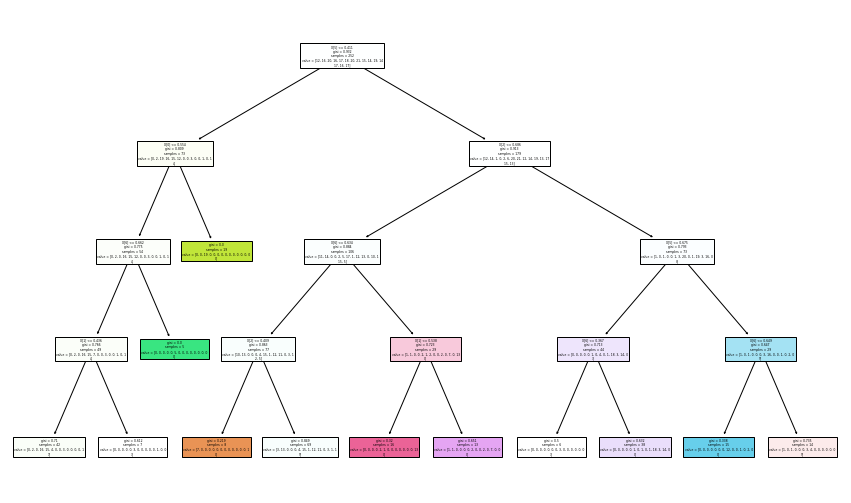

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15,9))
plot_tree(dt_clf,filled=True); 

In [197]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(mydata, y)
print(model.feature_importances_)

[0.14161841 0.13789941 0.13148628 0.14243452 0.13503119 0.14206245
 0.16946774]


In [25]:
mydata2= mydata[['V27','V51']].to_numpy()
mydata2
y = target.to_numpy()

In [26]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(mydata2, y,test_size=0.3 )

In [66]:
from sklearn.tree import DecisionTreeClassifier
dt_clf2 = DecisionTreeClassifier(max_depth=5)
dt_clf2.fit(X_train2, y_train2)
dt_clf2.score(X_test2, y_test2)

0.32407407407407407

In [67]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#F0F8FF','#FAEBD7','#CDC0B0','#8B8378', '#00FFFF', 
                                  '#66CDAA', '#458B74', '#C1CDCD', '#E3CF57', '#FFE4C4', 
                                  '#0000FF', '#8A2BE2', '#A52A2A','#DEB887','#8A360F'])
    
    plt.contourf(x0, x1, zz, cmap=custom_cmap)

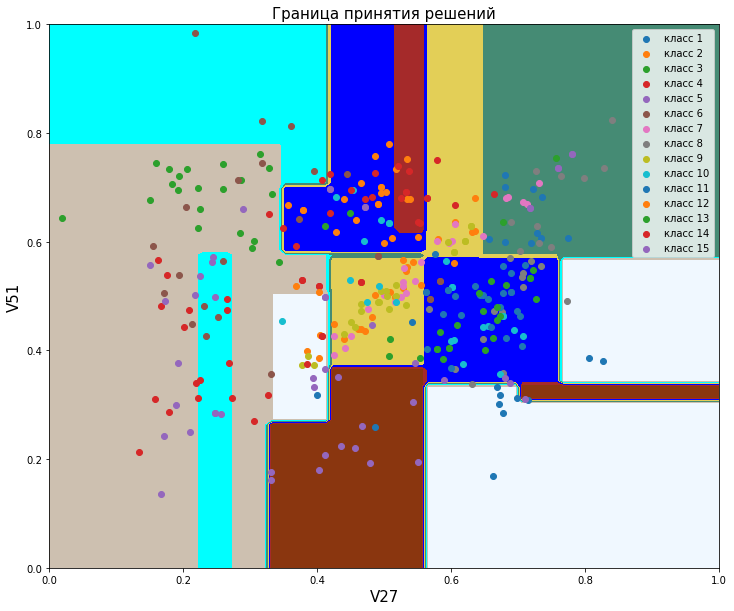

In [68]:
plt.figure(figsize=(12,10))
plt.title('Граница принятия решений', fontsize = 15)
plt.xlabel('V27', fontsize = 15)
plt.ylabel('V51', fontsize = 15)
plot_decision_boundary(dt_clf2,  axis=[0, 1, 0, 1])
plt.scatter(mydata2[y==1,0], mydata2[y==1,1], label = 'класс 1')
plt.scatter(mydata2[y==2,0], mydata2[y==2,1], label = 'класс 2')
plt.scatter(mydata2[y==3,0], mydata2[y==3,1], label = 'класс 3')
plt.scatter(mydata2[y==4,0], mydata2[y==4,1], label = 'класс 4')
plt.scatter(mydata2[y==5,0], mydata2[y==5,1], label = 'класс 5')
plt.scatter(mydata2[y==6,0], mydata2[y==6,1], label = 'класс 6')
plt.scatter(mydata2[y==7,0], mydata2[y==7,1], label = 'класс 7')
plt.scatter(mydata2[y==8,0], mydata2[y==8,1], label = 'класс 8')
plt.scatter(mydata2[y==9,0], mydata2[y==9,1], label = 'класс 9')
plt.scatter(mydata2[y==10,0], mydata2[y==10,1], label = 'класс 10')
plt.scatter(mydata2[y==11,0], mydata2[y==11,1], label = 'класс 11')
plt.scatter(mydata2[y==12,0], mydata2[y==12,1], label = 'класс 12')
plt.scatter(mydata2[y==13,0], mydata2[y==13,1], label = 'класс 13')
plt.scatter(mydata2[y==14,0], mydata2[y==14,1], label = 'класс 14')
plt.scatter(mydata2[y==15,0], mydata2[y==15,1], label = 'класс 15')

plt.legend();

#### 6. Постройте на основе классификатора деревьев решений ансамблевые классификаторы:
- BaggingClassifier,
- RandomForestClassifier,
- AdaBoostClassifier, 

а также классификатор:
- GradientBoostingClassifier, 

подберите параметры классификаторов, чтобы добиться большей точности классификации, и постройте границы принятия решений классификаторов с визуализацией точек набора данных и легендой для меток классов.

#### BaggingClassifier

In [44]:
X = mydata.to_numpy()
y = target.to_numpy()
X2 = mydata2
y2 = target.to_numpy()

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=5000, max_samples=100,
                           bootstrap=True, oob_score=True)
bagging_clf.fit(X, y)
bagging_clf.oob_score_


0.5638888888888889

In [46]:
bagging_clf2 = BaggingClassifier(DecisionTreeClassifier(),
                           n_estimators=50, max_samples=100,
                           bootstrap=True, oob_score=True)
bagging_clf2.fit(X2, y2);

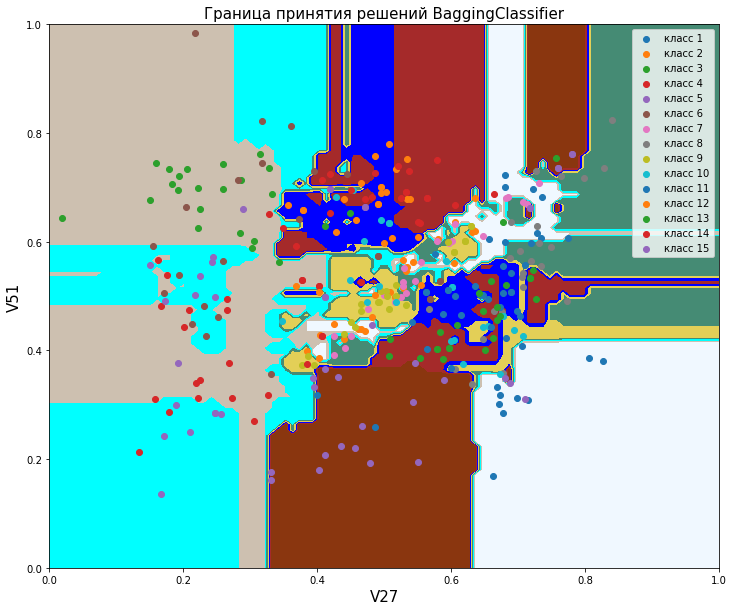

In [62]:
plt.figure(figsize=(12,10))
plt.title('Граница принятия решений BaggingClassifier', fontsize = 15)
plt.xlabel('V27', fontsize = 15)
plt.ylabel('V51', fontsize = 15)
plot_decision_boundary(bagging_clf2, axis=[0, 1, 0, 1])

plt.scatter(X2[y==1,0], X2[y2==1,1], label = 'класс 1')
plt.scatter(X2[y==2,0], X2[y2==2,1], label = 'класс 2')
plt.scatter(X2[y==3,0], X2[y2==3,1], label = 'класс 3')
plt.scatter(X2[y==4,0], X2[y2==4,1], label = 'класс 4')
plt.scatter(X2[y==5,0], X2[y2==5,1], label = 'класс 5')
plt.scatter(X2[y==6,0], X2[y2==6,1], label = 'класс 6')
plt.scatter(X2[y==7,0], X2[y2==7,1], label = 'класс 7')
plt.scatter(X2[y==8,0], X2[y2==8,1], label = 'класс 8')
plt.scatter(X2[y==9,0], X2[y2==9,1], label = 'класс 9')
plt.scatter(X2[y==10,0], X2[y2==10,1], label = 'класс 10')
plt.scatter(X2[y==11,0], X2[y2==11,1], label = 'класс 11')
plt.scatter(X2[y==12,0], X2[y2==12,1], label = 'класс 12')
plt.scatter(X2[y==13,0], X2[y2==13,1], label = 'класс 13')
plt.scatter(X2[y==14,0], X2[y2==14,1], label = 'класс 14')
plt.scatter(X2[y==15,0], X2[y2==15,1], label = 'класс 15')
plt.legend();

#### RandomForestClassifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500, oob_score=True, 
                                random_state=666, n_jobs=-1)

rf_clf.fit(X, y)
rf_clf.oob_score_

0.6

In [49]:
rf_clf2 = RandomForestClassifier(n_estimators=500, oob_score=True, 
                                random_state=666, n_jobs=-1)

rf_clf2.fit(X2, y2);

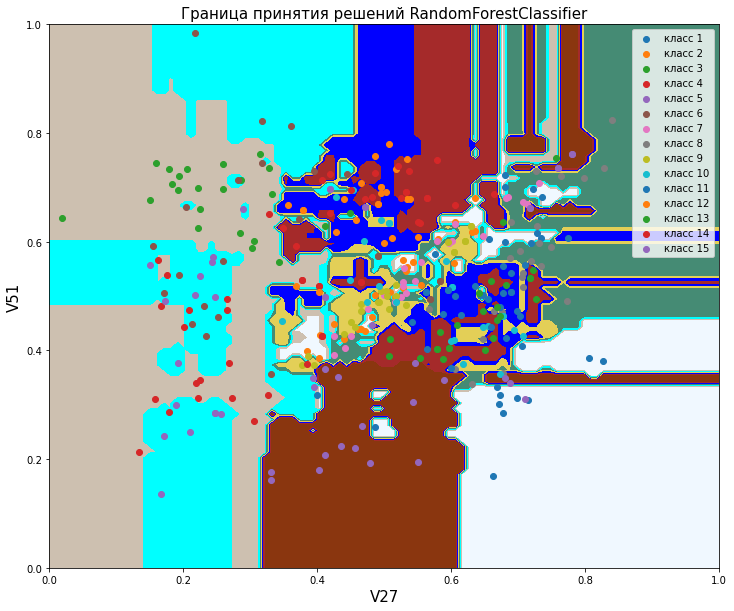

In [63]:
plt.figure(figsize=(12,10))
plt.title('Граница принятия решений RandomForestClassifier', fontsize = 15)
plt.xlabel('V27', fontsize = 15)
plt.ylabel('V51', fontsize = 15)
plot_decision_boundary(rf_clf2, axis=[0, 1, 0, 1])

plt.scatter(X2[y==1,0], X2[y2==1,1], label = 'класс 1')
plt.scatter(X2[y==2,0], X2[y2==2,1], label = 'класс 2')
plt.scatter(X2[y==3,0], X2[y2==3,1], label = 'класс 3')
plt.scatter(X2[y==4,0], X2[y2==4,1], label = 'класс 4')
plt.scatter(X2[y==5,0], X2[y2==5,1], label = 'класс 5')
plt.scatter(X2[y==6,0], X2[y2==6,1], label = 'класс 6')
plt.scatter(X2[y==7,0], X2[y2==7,1], label = 'класс 7')
plt.scatter(X2[y==8,0], X2[y2==8,1], label = 'класс 8')
plt.scatter(X2[y==9,0], X2[y2==9,1], label = 'класс 9')
plt.scatter(X2[y==10,0], X2[y2==10,1], label = 'класс 10')
plt.scatter(X2[y==11,0], X2[y2==11,1], label = 'класс 11')
plt.scatter(X2[y==12,0], X2[y2==12,1], label = 'класс 12')
plt.scatter(X2[y==13,0], X2[y2==13,1], label = 'класс 13')
plt.scatter(X2[y==14,0], X2[y2==14,1], label = 'класс 14')
plt.scatter(X2[y==15,0], X2[y2==15,1], label = 'класс 15')
plt.legend();

#### AdaBoostClassifier

In [51]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=500)

ada_clf.fit(X, y)
ada_clf.score(X, y)

0.3527777777777778

In [52]:
ada_clf2 = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=2), n_estimators=500)


ada_clf2.fit(X2, y2);

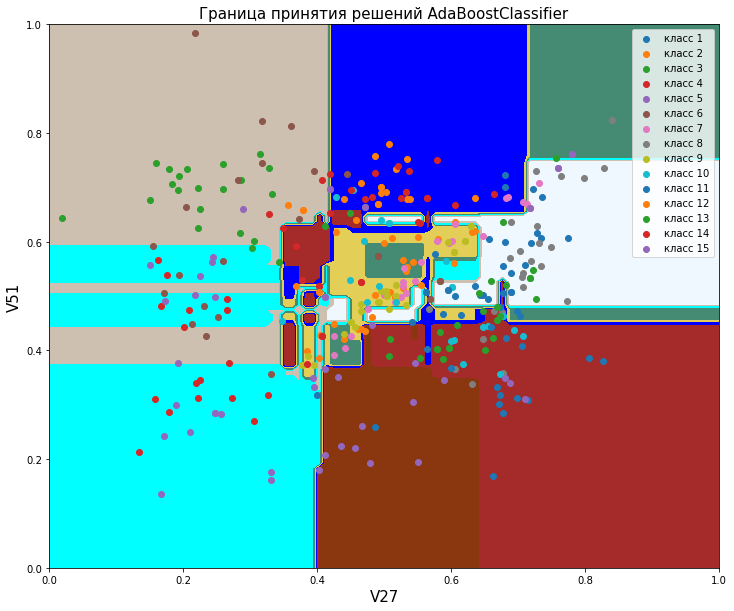

In [64]:
plt.figure(figsize=(12,10))
plt.title('Граница принятия решений AdaBoostClassifier', fontsize = 15)
plt.xlabel('V27', fontsize = 15)
plt.ylabel('V51', fontsize = 15)
plot_decision_boundary(ada_clf2, axis=[0, 1, 0, 1])

plt.scatter(X2[y==1,0], X2[y2==1,1], label = 'класс 1')
plt.scatter(X2[y==2,0], X2[y2==2,1], label = 'класс 2')
plt.scatter(X2[y==3,0], X2[y2==3,1], label = 'класс 3')
plt.scatter(X2[y==4,0], X2[y2==4,1], label = 'класс 4')
plt.scatter(X2[y==5,0], X2[y2==5,1], label = 'класс 5')
plt.scatter(X2[y==6,0], X2[y2==6,1], label = 'класс 6')
plt.scatter(X2[y==7,0], X2[y2==7,1], label = 'класс 7')
plt.scatter(X2[y==8,0], X2[y2==8,1], label = 'класс 8')
plt.scatter(X2[y==9,0], X2[y2==9,1], label = 'класс 9')
plt.scatter(X2[y==10,0], X2[y2==10,1], label = 'класс 10')
plt.scatter(X2[y==11,0], X2[y2==11,1], label = 'класс 11')
plt.scatter(X2[y==12,0], X2[y2==12,1], label = 'класс 12')
plt.scatter(X2[y==13,0], X2[y2==13,1], label = 'класс 13')
plt.scatter(X2[y==14,0], X2[y2==14,1], label = 'класс 14')
plt.scatter(X2[y==15,0], X2[y2==15,1], label = 'класс 15')
plt.legend();

#### GradientBoostingClassifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(max_depth=2, n_estimators=30)

gb_clf.fit(X, y)
gb_clf.score(X, y)

0.9

In [55]:
gb_clf2 = GradientBoostingClassifier(max_depth=2, n_estimators=30)

gb_clf2.fit(X2, y2);

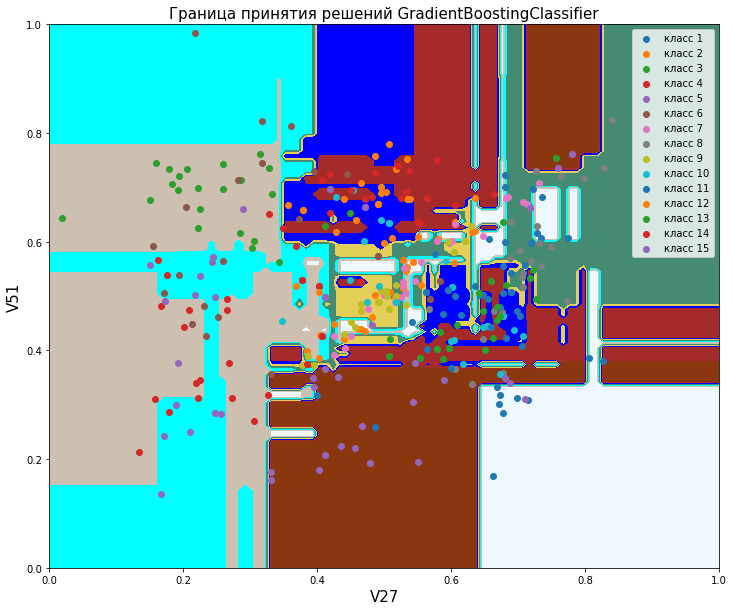

In [65]:
plt.figure(figsize=(12,10))
plt.title('Граница принятия решений GradientBoostingClassifier', fontsize = 15)
plt.xlabel('V27', fontsize = 15)
plt.ylabel('V51', fontsize = 15)
plot_decision_boundary(gb_clf2, axis=[0, 1, 0, 1])

plt.scatter(X2[y==1,0], X2[y2==1,1], label = 'класс 1')
plt.scatter(X2[y==2,0], X2[y2==2,1], label = 'класс 2')
plt.scatter(X2[y==3,0], X2[y2==3,1], label = 'класс 3')
plt.scatter(X2[y==4,0], X2[y2==4,1], label = 'класс 4')
plt.scatter(X2[y==5,0], X2[y2==5,1], label = 'класс 5')
plt.scatter(X2[y==6,0], X2[y2==6,1], label = 'класс 6')
plt.scatter(X2[y==7,0], X2[y2==7,1], label = 'класс 7')
plt.scatter(X2[y==8,0], X2[y2==8,1], label = 'класс 8')
plt.scatter(X2[y==9,0], X2[y2==9,1], label = 'класс 9')
plt.scatter(X2[y==10,0], X2[y2==10,1], label = 'класс 10')
plt.scatter(X2[y==11,0], X2[y2==11,1], label = 'класс 11')
plt.scatter(X2[y==12,0], X2[y2==12,1], label = 'класс 12')
plt.scatter(X2[y==13,0], X2[y2==13,1], label = 'класс 13')
plt.scatter(X2[y==14,0], X2[y2==14,1], label = 'класс 14')
plt.scatter(X2[y==15,0], X2[y2==15,1], label = 'класс 15')
plt.legend();

#### 7. Определите лучший ансамблевый классификатор, дающий наиболее высокую точность классификации.

лучший ансамблевый классификатор- GradientBoostingClassifier¶